In [1]:
# importing necessary libraries and configurations
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet
from fbprophet.plot import plot_plotly

plt.style.use("seaborn")
%matplotlib inline

In [2]:
# loading the data set
df = pd.read_csv("df_53.csv")

In [3]:
# data cleaning and indexing 
df.drop("zip_code", axis=1, inplace=True)

df.occurred_date_time = df.occurred_date_time.astype("datetime64")
df.set_index(["occurred_date_time"], inplace=True)
df.sort_index(inplace=True)

# examining the new data frame
display(df.head())
display(df.tail())

highest_offense_description     report_date_time  \
occurred_date_time                                                     
2003-01-01 00:00:00              IDENTITY THEFT  2010-04-14 14:59:00   
2003-01-01 00:01:00                  HARASSMENT  2003-08-25 11:37:00   
2003-01-01 00:01:00     STATUTORY RAPE OF CHILD  2003-04-25 12:51:00   
2003-01-01 00:01:00           CRIMINAL MISCHIEF  2003-01-01 13:11:00   
2003-01-01 00:01:00       THEFT BY EMBEZZLEMENT  2003-10-13 08:49:00   

                                    location_type                  address  \
occurred_date_time                                                           
2003-01-01 00:00:00              RESIDENCE / HOME            1088 PARK PLZ   
2003-01-01 00:01:00              RESIDENCE / HOME    9725 N I 35 NB SVC RD   
2003-01-01 00:01:00              RESIDENCE / HOME  300 BLOCK W RUNDBERG LN   
2003-01-01 00:01:00         PARKING LOTS / GARAGE    8800 N I 35 SB SVC RD   
2003-01-01 00:01:00  COMMERCIAL / OFFICE BUILDING        313 E RUNDBERG LN   

                     council_district apd_sector  apd_district  \
occurred_date_time                                               
2003-01-01 00:00:00               4.0         ED           3.0   
2003-01-01 00:01:00               NaN         ED           7.0   
2003-01-01 00:01:00               4.0         ED           1.0   
2003-01-01 00:01:00               4.0         ID           2.0   
2003-01-01 00:01:00               4.0         ED           1.0   

                    clearance_status       clearance_date   latitude  \
occurred_date_time                                                     
2003-01-01 00:00:00                O  2010-04-15 00:00:00  30.348871   
2003-01-01 00:01:00              NaN  2003-08-26 00:00:00  30.361871   
2003-01-01 00:01:00                N                  NaN        NaN   
2003-01-01 00:01:00                N                  NaN  30.352849   
2003-01-01 00:01:00                C  2003-10-20 00:00:00  30.359639   

                     longitude  year  month  week  day  hour  
occurred_date_time                                            
2003-01-01 00:00:00 -97.685233  2003      1     1    1     0  
2003-01-01 00:01:00 -97.685342  2003      1     1    1     0  
2003-01-01 00:01:00        NaN  2003      1     1    1     0  
2003-01-01 00:01:00 -97.691828  2003      1     1    1     0  
2003-01-01 00:01:00 -97.691895  2003      1     1    1     0

highest_offense_description     report_date_time  \
occurred_date_time                                                        
2020-12-05 11:23:00              CRIMINAL TRESPASS  2020-12-05 11:23:00   
2020-12-05 11:25:00             FAMILY DISTURBANCE  2020-12-05 11:25:00   
2020-12-05 11:49:00  ASSAULT BY CONTACT FAM/DATING  2020-12-05 11:49:00   
2020-12-05 12:39:00    FAMILY DISTURBANCE/PARENTAL  2020-12-05 12:39:00   
2020-12-05 14:55:00    VIOL CITY ORDINANCE - OTHER  2020-12-05 14:55:00   

                        location_type                address  \
occurred_date_time                                             
2020-12-05 11:23:00  RESIDENCE / HOME    8221 SAM RAYBURN DR   
2020-12-05 11:25:00  RESIDENCE / HOME  12227 SHROPSHIRE BLVD   
2020-12-05 11:49:00  RESIDENCE / HOME   12800 CENTER LAKE DR   
2020-12-05 12:39:00  RESIDENCE / HOME        300 FERGUSON DR   
2020-12-05 14:55:00     FIELD / WOODS          609 BEAVER ST   

                     council_district apd_sector  apd_district  \
occurred_date_time                                               
2020-12-05 11:23:00               4.0         ED           1.0   
2020-12-05 11:25:00               1.0         ED           7.0   
2020-12-05 11:49:00               7.0         ED           6.0   
2020-12-05 12:39:00               4.0         ED           1.0   
2020-12-05 14:55:00               4.0         ED           1.0   

                    clearance_status clearance_date   latitude  longitude  \
occurred_date_time                                                          
2020-12-05 11:23:00              NaN            NaN  30.347453 -97.698936   
2020-12-05 11:25:00              NaN            NaN  30.389098 -97.656216   
2020-12-05 11:49:00              NaN            NaN  30.407014 -97.668623   
2020-12-05 12:39:00              NaN            NaN  30.376325 -97.685110   
2020-12-05 14:55:00              NaN            NaN  30.353479 -97.703180   

                     year  month  week  day  hour  
occurred_date_time                                 
2020-12-05 11:23:00  2020     12    49    5    11  
2020-12-05 11:25:00  2020     12    49    5    11  
2020-12-05 11:49:00  2020     12    49    5    11  
2020-12-05 12:39:00  2020     12    49    5    12  
2020-12-05 14:55:00  2020     12    49    5    14

In [4]:
# Creating violent crime and murder data frames for analysis
df_viol = df.query(
    'highest_offense_description == ["AGG ASSAULT", "AGG ROBBERY/DEADLY WEAPON", "CAPITAL MURDER", "MURDER", "RAPE"]'
)
df_viol_mur = df.query('highest_offense_description == ["MURDER", "CAPITAL MURDER"]')

# Annual overall crime (2017-present)
df_17 = df[df.year == 2017]
df_18 = df[df.year == 2018]
df_19 = df[df.year == 2019]
df_20 = df[df.year == 2020]

# Annual violent crime (2017-present)
df_viol_17 = df_viol[df_viol.year == 2017]
df_viol_18 = df_viol[df_viol.year == 2018]
df_viol_19 = df_viol[df_viol.year == 2019]
df_viol_20 = df_viol[df_viol.year == 2020]

# Annual murders (2017-present)
df_viol_mur_17 = df_viol_mur[df_viol_mur.year == 2017]
df_viol_mur_18 = df_viol_mur[df_viol_mur.year == 2018]
df_viol_mur_19 = df_viol_mur[df_viol_mur.year == 2019]
df_viol_mur_20 = df_viol_mur[df_viol_mur.year == 2020]

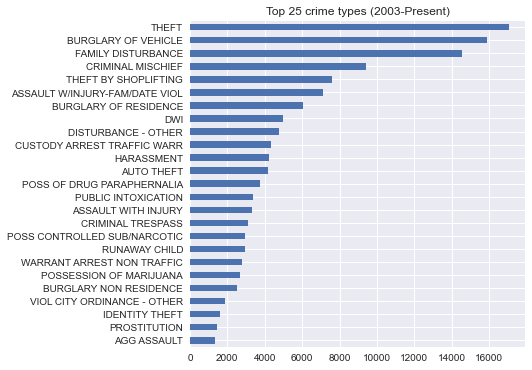

----------------------------------------------------------
----------------------------------------------------------


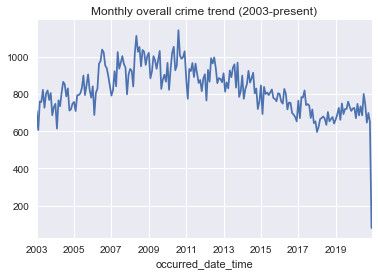

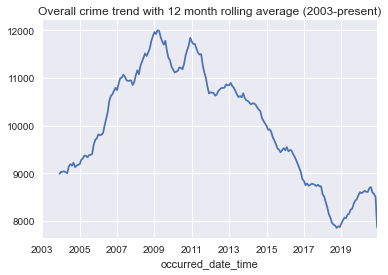

----------------------------------------------------------
----------------------------------------------------------


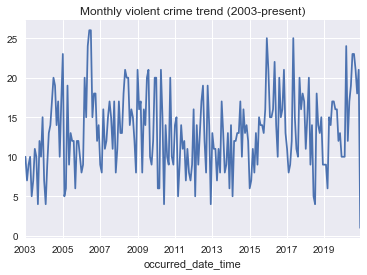

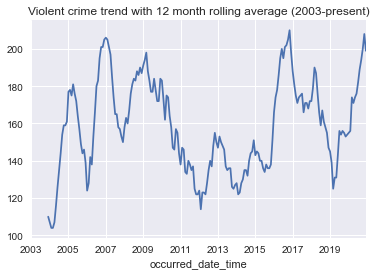

In [14]:
# Top 25 crime types
df.highest_offense_description.value_counts().head(25).sort_values().plot.barh(
    figsize=(6, 6), title="Top 25 crime types (2003-Present)"
)
plt.show()

print("----------------------------------------------------------")
print("----------------------------------------------------------")

df.resample("M").size().plot(
    title="Monthly overall crime trend (2003-present)",  # figsize=(8, 5)
)
plt.show()

# Violent crime trend with a year rolling average
df.resample("M").size().rolling(12).sum().plot(
    title="Overall crime trend with 12 month rolling average (2003-present)",
    # figsize=(8, 5),
)
plt.show()

print("----------------------------------------------------------")
print("----------------------------------------------------------")

# Plotting violent crime trend on a monthly basis
df_viol.resample("M").size().plot(
    title="Monthly violent crime trend (2003-present)",  # figsize=(8, 5)
)
plt.show()

# Violent crime trend with a year rolling average
df_viol.resample("M").size().rolling(12).sum().plot(
    title="Violent crime trend with 12 month rolling average (2003-present)",
    # figsize=(8, 5),
)
plt.show()

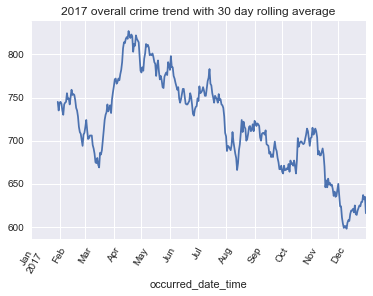

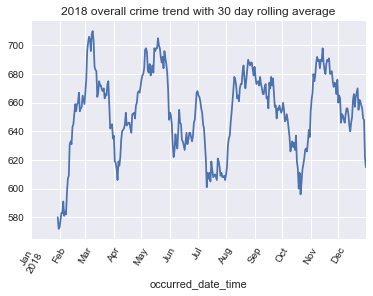

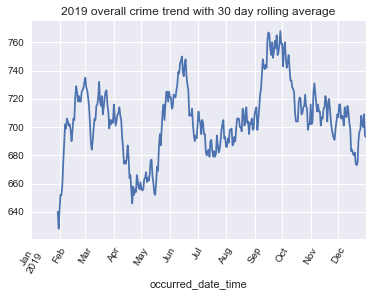

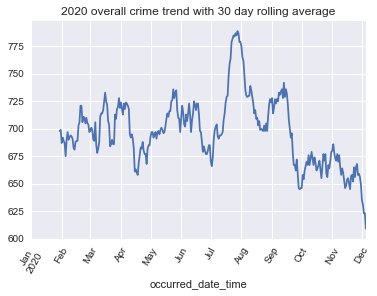

In [15]:
df_17.resample("D").size().rolling(30).sum().plot(
    # fontsize=12,
    # figsize=(8, 5),
    rot=60,
    title="2017 overall crime trend with 30 day rolling average",
)
plt.show()

print("==============================================================================")
print("==============================================================================")

df_18.resample("D").size().rolling(30).sum().plot(
    # fontsize=12,
    # figsize=(8, 5),
    rot=60,
    title="2018 overall crime trend with 30 day rolling average",
)
plt.show()

print("==============================================================================")
print("==============================================================================")

df_19.resample("D").size().rolling(30).sum().plot(
    # fontsize=12,
    # figsize=(8, 5),
    rot=60,
    title="2019 overall crime trend with 30 day rolling average",
)
plt.show()

print("==============================================================================")
print("==============================================================================")

df_20.resample("D").size().rolling(30).sum().plot(
    # fontsize=12,
    # figsize=(8, 5),
    rot=60,
    title="2020 overall crime trend with 30 day rolling average",
)
plt.show()

# ax = df_20.plot(x="year", figsize=(10, 6), label="overall crime")
# df_viol_20.plot(x="year", label="violent crime", ax=ax, rot=60)
# plt.show()

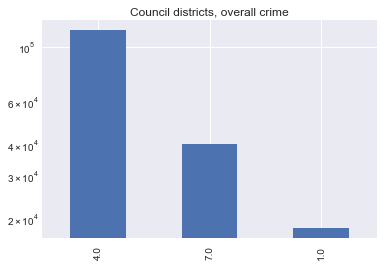

----------------------------------------------------------


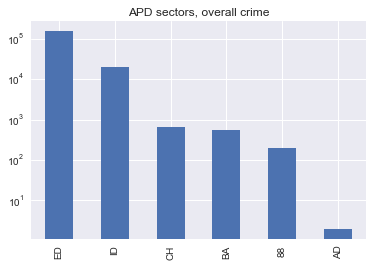

----------------------------------------------------------


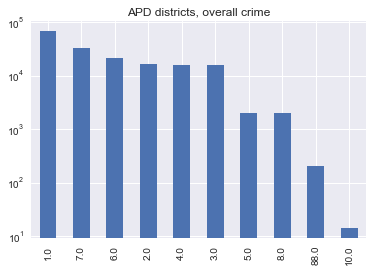

In [7]:
# Showing overall crime rates by council districts, APD districts, and sectors
df.council_district.value_counts().plot.bar(
    title="Council districts, overall crime", logy=True
)
plt.show()

print("----------------------------------------------------------")

df.apd_sector.value_counts().plot.bar(title="APD sectors, overall crime", logy=True)
plt.show()

print("----------------------------------------------------------")

df.apd_district.value_counts().plot.bar(title="APD districts, overall crime", logy=True)
plt.show()

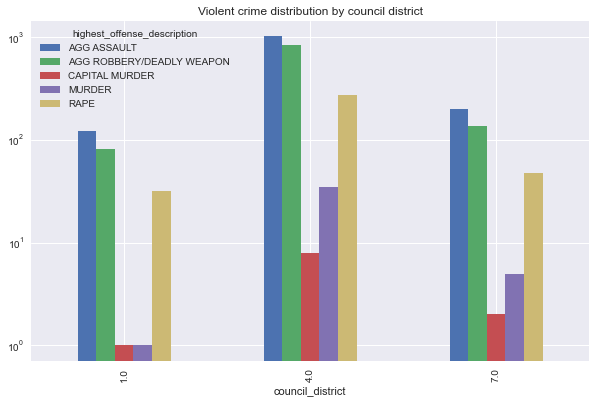

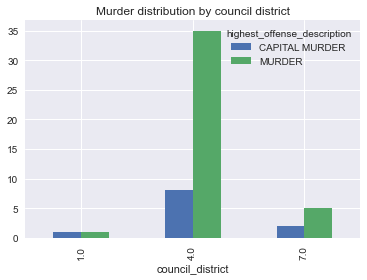

----------------------------------------------------------
----------------------------------------------------------


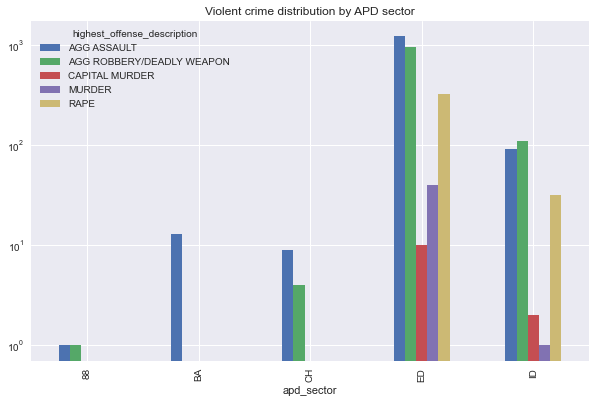

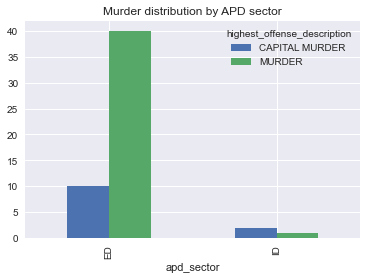

----------------------------------------------------------
----------------------------------------------------------


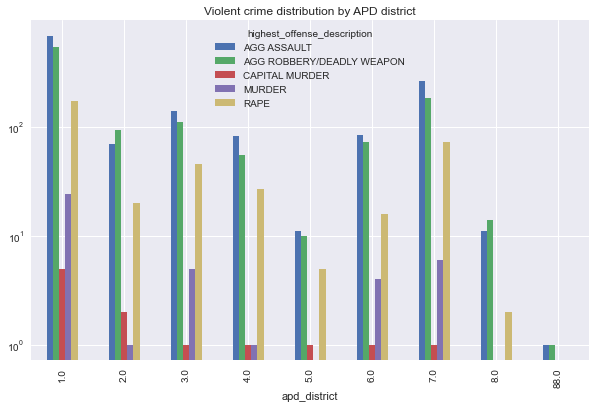

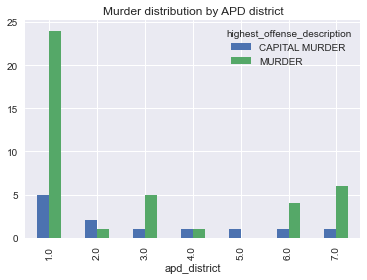

In [8]:
# Showing violent crime and murder rates by council districts, APD districts, and sectors
pd.crosstab(df_viol.council_district, df_viol.highest_offense_description).plot.bar(
    figsize=(10, 6.25),
    logy=True,
    title="Violent crime distribution by council district",
)
plt.show()

pd.crosstab(
    df_viol_mur.council_district, df_viol_mur.highest_offense_description
).plot.bar(title="Murder distribution by council district")
plt.show()

print("----------------------------------------------------------")
print("----------------------------------------------------------")

pd.crosstab(df_viol.apd_sector, df_viol.highest_offense_description).plot.bar(
    figsize=(10, 6.25), logy=True, title="Violent crime distribution by APD sector"
)
plt.show()

pd.crosstab(df_viol_mur.apd_sector, df_viol_mur.highest_offense_description).plot.bar(
    title="Murder distribution by APD sector"
)
plt.show()

print("----------------------------------------------------------")
print("----------------------------------------------------------")

pd.crosstab(df_viol.apd_district, df_viol.highest_offense_description).plot.bar(
    figsize=(10, 6.25), logy=True, title="Violent crime distribution by APD district"
)
plt.show()

pd.crosstab(df_viol_mur.apd_district, df_viol_mur.highest_offense_description).plot.bar(
    title="Murder distribution by APD district"
)
plt.show()

highest_offense_description                     AGG ASSAULT  \
location_type                                                 
ABANDONED/CONDEMNED STRUCTURE                             1   
AUTO DEALERSHIP NEW / USED                                0   
BANKS / SAVINGS & LOAN                                    0   
BAR / NIGHT CLUB                                         58   
CAMP / CAMPGROUND                                         1   
COMMERCIAL / OFFICE BUILDING                             24   
COMMUNITY CENTER                                          1   
CONSTRUCTION SITE                                         2   
CONVENIENCE STORE                                        17   
DEPARTMENT / DISCOUNT STORE                               8   
DRUG STORE / DR. OFFICE / HOSPITAL                        2   
FIELD / WOODS                                            32   
GAMBLING FACILITY / CASINO / RACE TRACK                   0   
GAS / SERVICE STATIONS                                   26   
GOVERNMENT / PUBLIC BUILDING                              0   
GROCERY / SUPERMARKET                                     4   
HOTEL / MOTEL / ETC.                                     76   
LAKE / WATERWAY                                           0   
LIQUOR STORE                                              1   
OTHER / UNKNOWN                                          20   
PARK / PLAYGROUND                                         6   
PARKING LOTS / GARAGE                                   360   
RENTAL STORAGE FACILITY                                   1   
RESIDENCE / HOME                                        345   
REST AREA                                                 0   
RESTAURANTS                                              11   
SCHOOL - COLLEGE / UNIVERSITY                             1   
SCHOOLS / COLLEGES                                        2   
SHOPPING MALL                                             1   
SPECIALTY  STORE (TV  FUR ETC.)                           2   
STREETS / HWY / ROAD / ALLEY                            346   
TRANSPORTATION (AIR / BUS / TRAIN - TERMINALS)            1   

highest_offense_description                     AGG ROBBERY/DEADLY WEAPON  \
location_type                                                               
ABANDONED/CONDEMNED STRUCTURE                                           3   
AUTO DEALERSHIP NEW / USED                                              1   
BANKS / SAVINGS & LOAN                                                  8   
BAR / NIGHT CLUB                                                        6   
CAMP / CAMPGROUND                                                       0   
COMMERCIAL / OFFICE BUILDING                                           54   
COMMUNITY CENTER                                                        0   
CONSTRUCTION SITE                                                       0   
CONVENIENCE STORE                                                      39   
DEPARTMENT / DISCOUNT STORE                                            12   
DRUG STORE / DR. OFFICE / HOSPITAL                                      3   
FIELD / WOODS                                                           5   
GAMBLING FACILITY / CASINO / RACE TRACK                                 2   
GAS / SERVICE STATIONS                                                 33   
GOVERNMENT / PUBLIC BUILDING                                            0   
GROCERY / SUPERMARKET                                                   8   
HOTEL / MOTEL / ETC.                                                   58   
LAKE / WATERWAY                                                         2   
LIQUOR STORE                                                            2   
OTHER / UNKNOWN                                                        23   
PARK / PLAYGROUND                                                       1   
PARKING LOTS / GARAGE                                                 427   
RENTAL ST

----------------------------------------------------------
----------------------------------------------------------


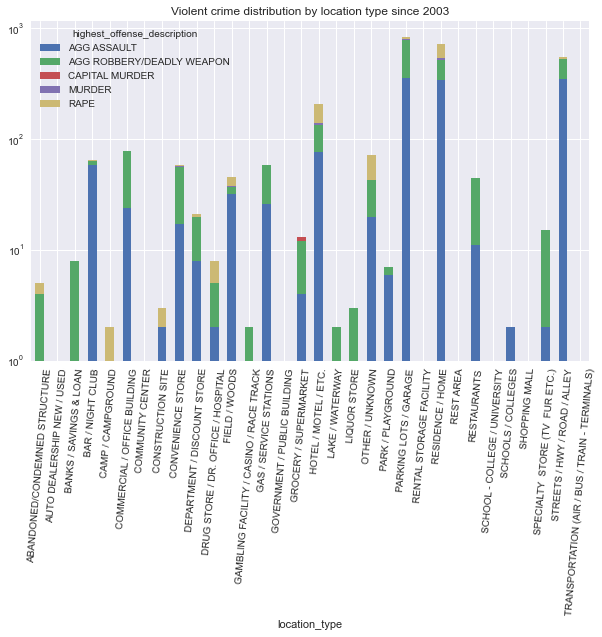

----------------------------------------------------------
----------------------------------------------------------


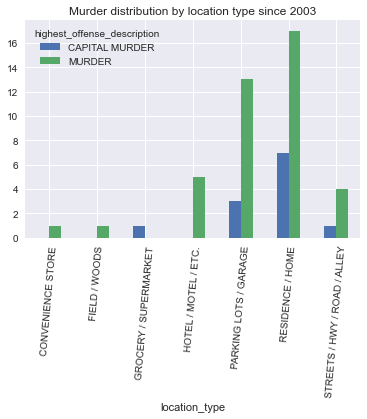

In [9]:
# Showing violent crime and murder rates by location type
viol_loc = pd.crosstab(df_viol.location_type, df_viol.highest_offense_description)
display(viol_loc)

print("----------------------------------------------------------")
print("----------------------------------------------------------")

mur_loc = pd.crosstab(
    df_viol_mur.location_type, df_viol_mur.highest_offense_description
)

viol_loc.plot.bar(
    stacked=True,
    figsize=(10, 6.25),
    logy=True,
    rot=85,
    title="Violent crime distribution by location type since 2003",
)
plt.show()

print("----------------------------------------------------------")
print("----------------------------------------------------------")

mur_loc.plot.bar(rot=85, title="Murder distribution by location type since 2003")
plt.show()

INFO:fbprophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:fbprophet:Found custom seasonality named 'daily', disabling built-in 'daily' seasonality.


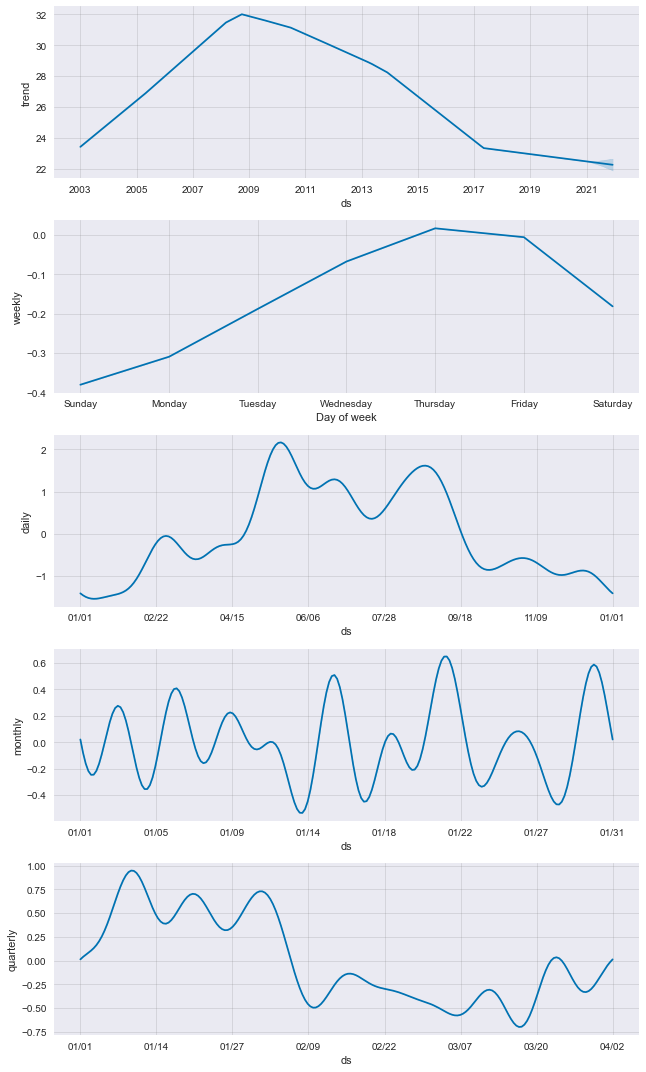

In [10]:
df_fbprophet = df

df_m = df_fbprophet.resample("D").size().reset_index()
df_m.columns = ["date", "daily_crime_count"]
df_m_final = df_m.rename(columns={"date": "ds", "daily_crime_count": "y"})

m = Prophet(interval_width=0.95, yearly_seasonality=False)
m.add_seasonality(name="monthly", period=30.5, fourier_order=10)
m.add_seasonality(name="quarterly", period=91.5, fourier_order=10)
m.add_seasonality(name="weekly", period=52, fourier_order=10)
m.add_seasonality(name="daily", period=365, fourier_order=10)
m.fit(df_m_final)

future = m.make_future_dataframe(periods=365, freq="D")
pred = m.predict(future)

fig2 = m.plot_components(pred)
fig2_1 = plot_plotly(m, pred)
fig2_1

INFO:fbprophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:fbprophet:Found custom seasonality named 'daily', disabling built-in 'daily' seasonality.


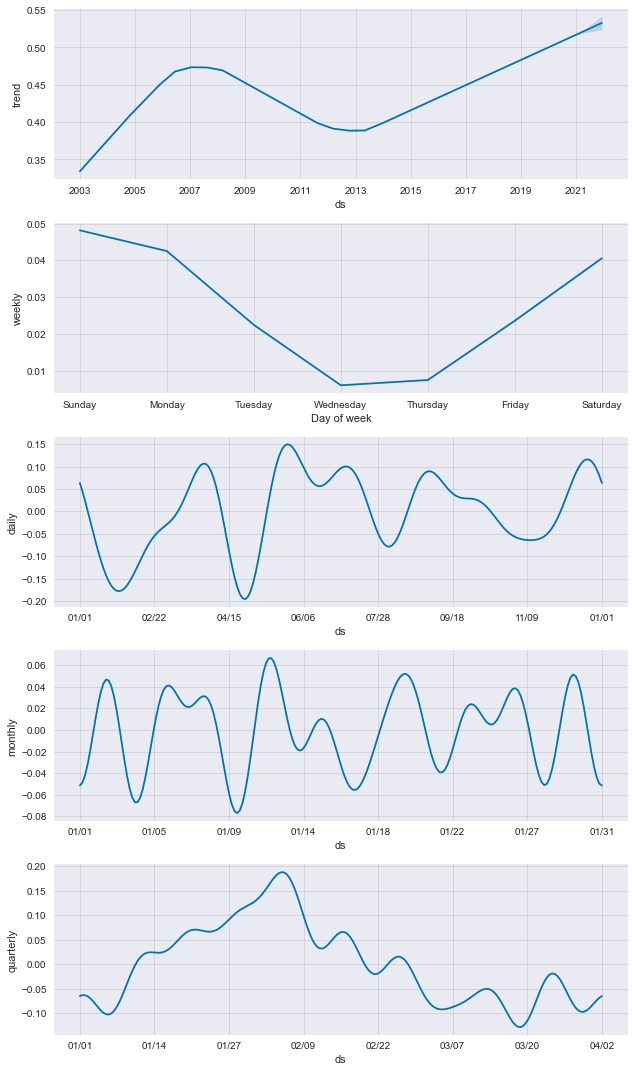

In [13]:
df_viol_fbprophet = df_viol

df_viol_n = df_viol_fbprophet.resample("D").size().reset_index()
df_viol_n.columns = ["date", "daily_crime_count"]
df_viol_n_final = df_viol_n.rename(columns={"date": "ds", "daily_crime_count": "y"})

n = Prophet(interval_width=0.95, yearly_seasonality=False)
n.add_seasonality(name="monthly", period=30.5, fourier_order=10)
n.add_seasonality(name="quarterly", period=91.5, fourier_order=10)
n.add_seasonality(name="weekly", period=52, fourier_order=10)
n.add_seasonality(name="daily", period=365, fourier_order=10)
n.fit(df_viol_n_final)

future = n.make_future_dataframe(periods=365, freq="D")
pred = n.predict(future)

fig3 = n.plot_components(pred)
fig3_1 = plot_plotly(n, pred)
fig3_1